#Loading the dataset

In [ ]:
import pandas as pd
import numpy as np
!pip install pycaret
!pip install pycaret [full]
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingRegressor


ERROR: Invalid requirement: '[full]'


In [ ]:
df=pd.read_csv('/content/CostReportsnf.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14543 entries, 0 to 14542
Data columns (total 64 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   rpt_rec_num                                                       14543 non-null  int64  
 1   Provider CCN                                                      14543 non-null  int64  
 2   Facility Name                                                     14543 non-null  object 
 3   Street Address                                                    14542 non-null  object 
 4   City                                                              14543 non-null  object 
 5   State Code                                                        14543 non-null  object 
 6   Zip Code                                                          14543 non-null  object 
 7   County                         

In [ ]:
#Calculating bed days used as it might help in the analysis
df['Bed Days Used'] = df['SNF Admissions Total'] * df['SNF Average Length of Stay Total']


In [ ]:
from pycaret.classification import *
!pip install sweetviz
import sweetviz as sv

In [ ]:
report = sv.analyze(df)
report.show_html('report.html')

                                             |          | [  0%]   00:00 -> (? left)

Report report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14543 entries, 0 to 14542
Data columns (total 65 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   rpt_rec_num                                                       14543 non-null  int64  
 1   Provider CCN                                                      14543 non-null  int64  
 2   Facility Name                                                     14543 non-null  object 
 3   Street Address                                                    14542 non-null  object 
 4   City                                                              14543 non-null  object 
 5   State Code                                                        14543 non-null  object 
 6   Zip Code                                                          14543 non-null  object 
 7   County                         

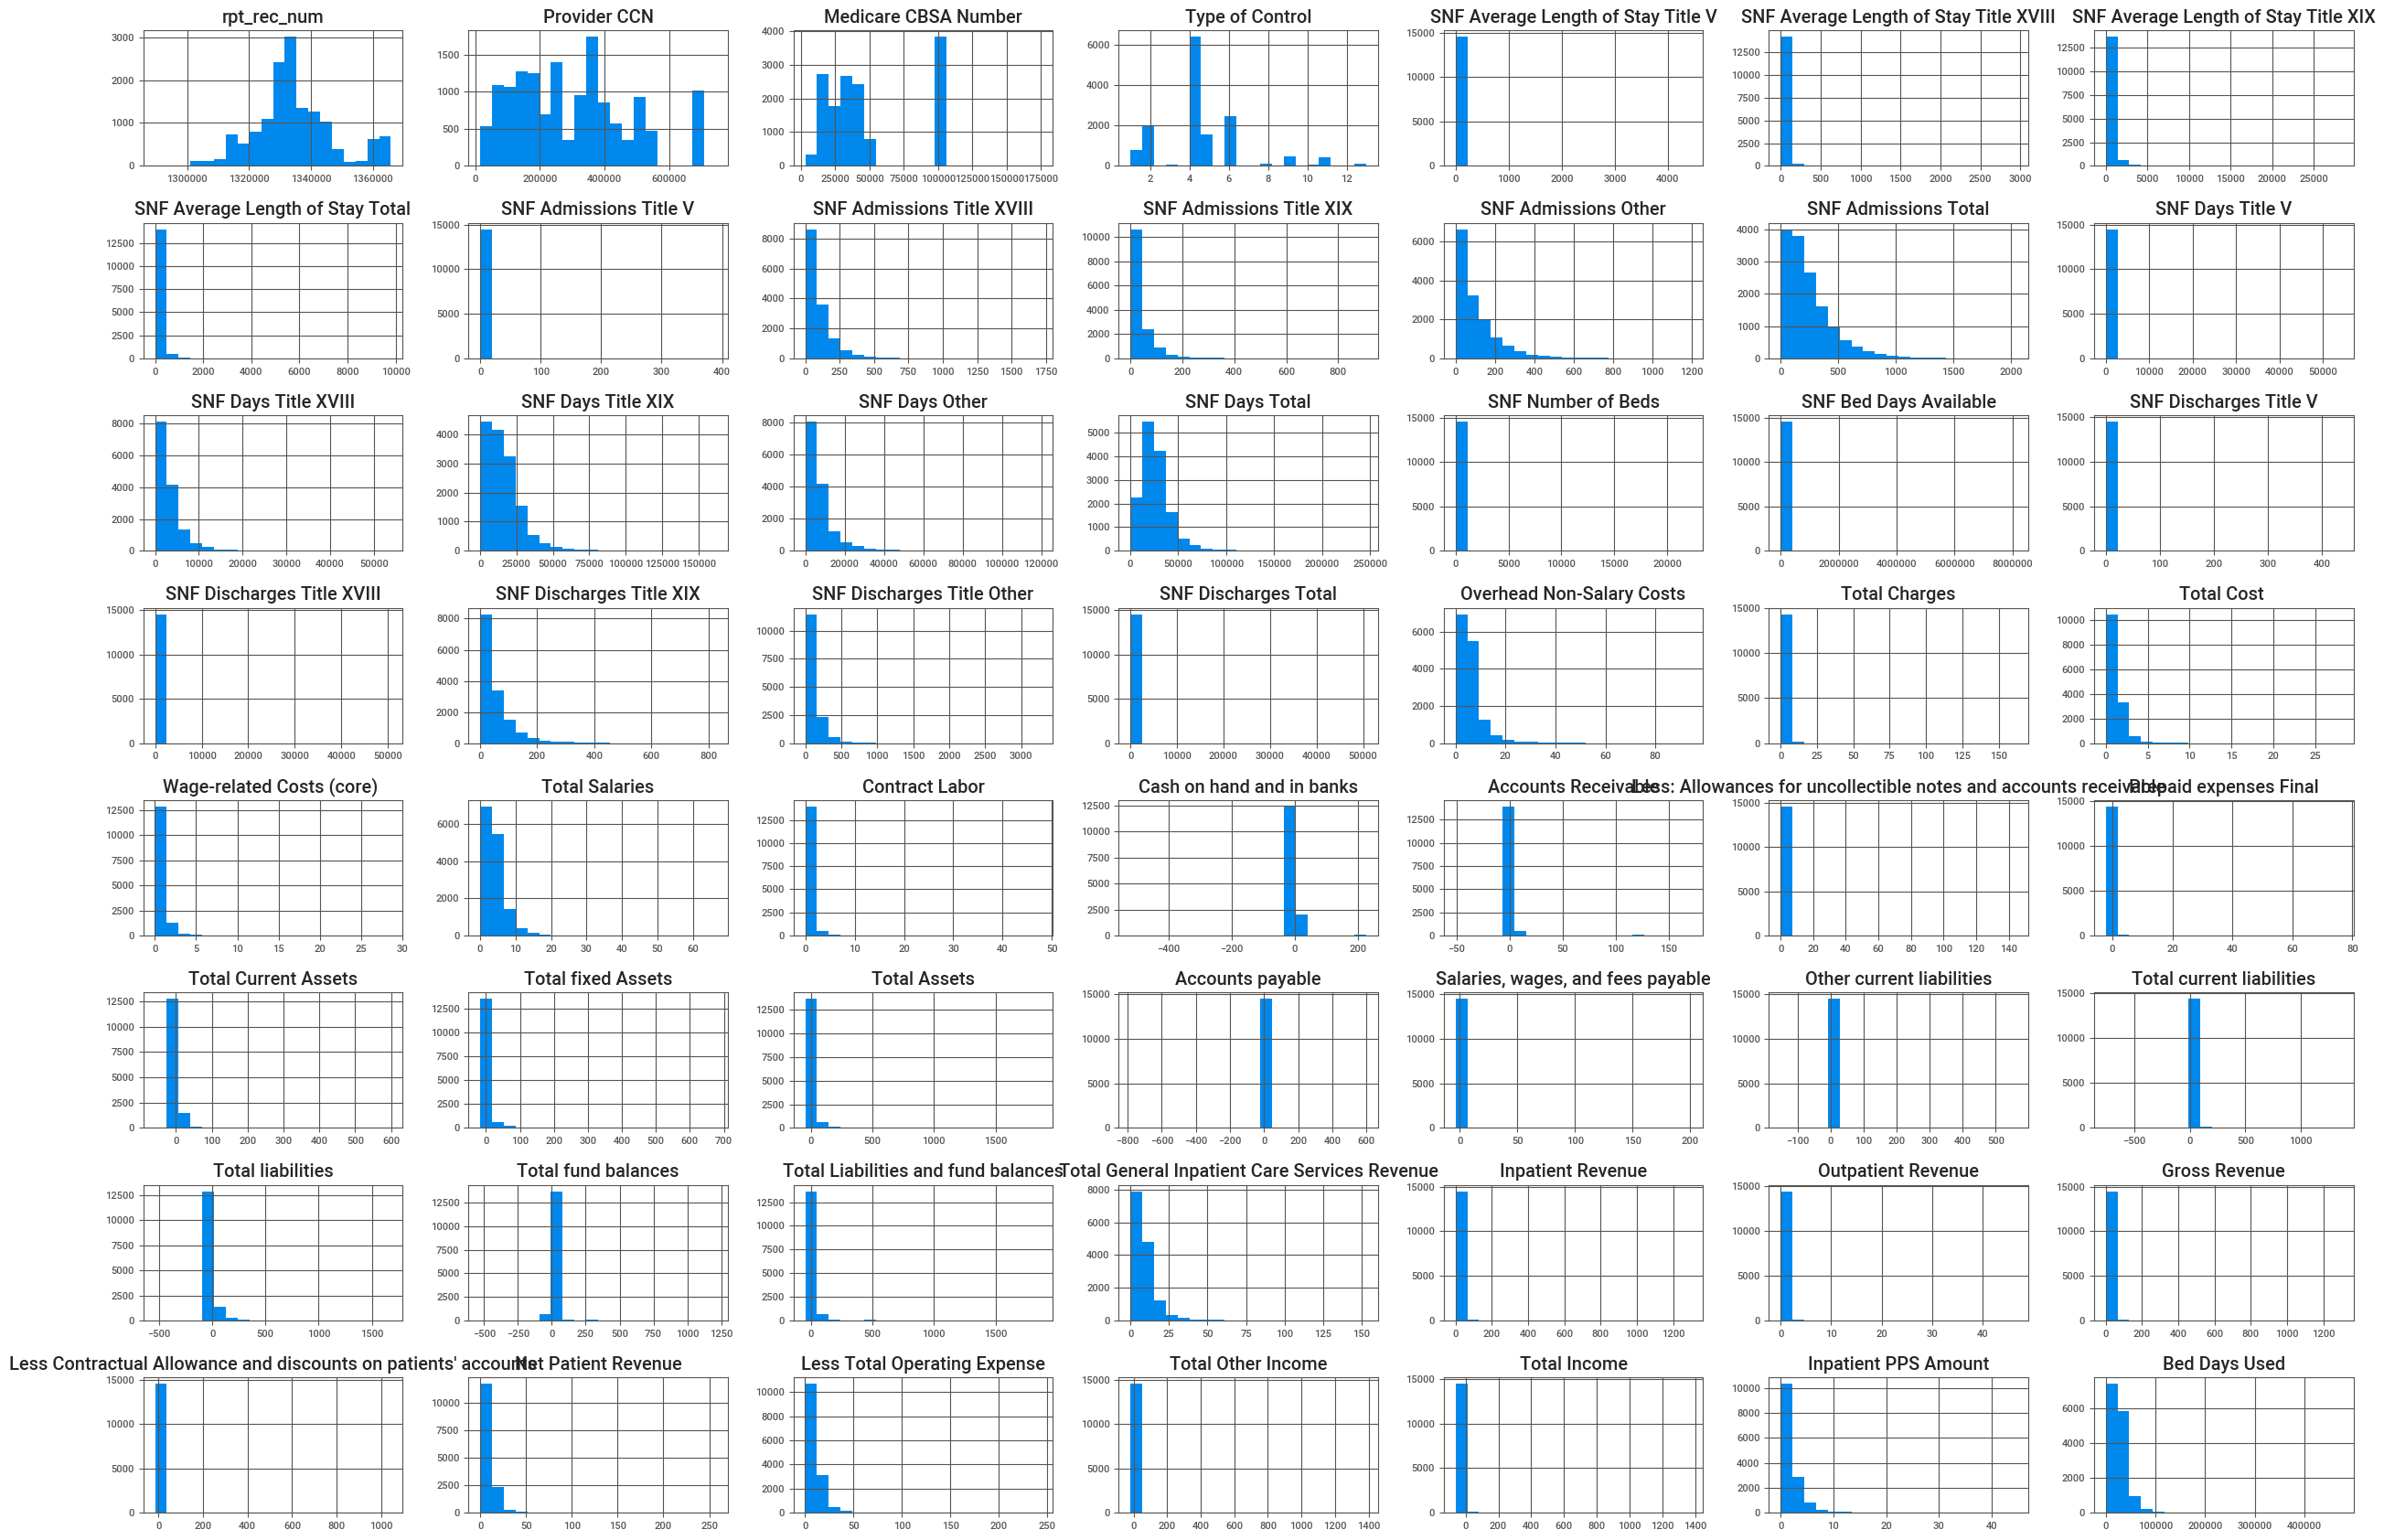

In [ ]:
df.hist(figsize=(25, 17), bins=20)
plt.tight_layout()
plt.show()

In [ ]:
df.describe()

,rpt_rec_num,Provider CCN,Medicare CBSA Number,Type of Control,SNF Average Length of Stay Title V,SNF Average Length of Stay Title XVIII,SNF Average Length of Stay Title XIX,SNF Average Length of Stay Total,SNF Admissions Title V,SNF Admissions Title XVIII,...,Inpatient Revenue,Outpatient Revenue,Gross Revenue,Less Contractual Allowance and discounts on patients' accounts,Net Patient Revenue,Less Total Operating Expense,Total Other Income,Total Income,Inpatient PPS Amount,Bed Days Used
count,1.454300e+04,14543.000000,14542.000000,14543.000000,14543.000000,14543.000000,14543.000000,14543.000000,14543.000000,14543.000000,...,14543.000000,14543.000000,14543.000000,14543.000000,14543.000000,14543.000000,14543.000000,14543.000000,14543.000000,14543.000000
mean,1.334474e+06,297828.367806,48415.382478,4.524445,1.454819,52.822736,548.476198,172.134220,0.435398,99.350753,...,11.413369,0.076226,11.489595,2.152882,9.336713,10.528229,1.599594,0.408186,2.013589,26534.959063
std,1.277384e+04,175057.802795,32237.337959,2.210101,45.773657,59.856579,1123.948047,213.904225,8.723495,104.758595,...,14.326517,0.836358,14.376044,9.530659,7.597973,9.145682,12.537785,11.894822,2.299443,18617.409274
min,1.289595e+06,15009.000000,3283.000000,1.000000,0.000000,0.000000,0.000000,0.870000,0.000000,0.000000,...,0.000000,-0.015443,0.000000,-14.963383,0.000000,0.196563,-19.970985,-61.713423,0.000000,0.000000
25%,1.327876e+06,155372.000000,23844.000000,4.000000,0.000000,30.715000,173.565000,82.875000,0.000000,32.000000,...,5.531326,0.000000,5.597393,0.204954,4.917815,5.496911,0.173981,-0.480440,0.703615,15071.150000
50%,1.333083e+06,265837.000000,36420.000000,4.000000,0.000000,41.680000,310.970000,125.410000,0.000000,68.000000,...,9.064552,0.000000,9.127195,1.002359,7.727128,8.505359,0.556845,0.167216,1.349678,23411.040000
75%,1.340346e+06,395756.500000,99905.000000,6.000000,0.000000,59.220000,571.720000,195.410000,0.000000,130.000000,...,14.124541,0.000000,14.191500,2.672146,11.496410,12.715033,1.263277,0.923503,2.491556,33697.095000
max,1.365892e+06,745001.000000,175185.000000,13.000000,4442.000000,2953.000000,28360.000000,9803.000000,390.000000,1715.000000,...,1300.406865,46.720919,1300.406865,1042.943670,257.463195,243.801076,1386.561005,1377.952134,44.700391,475264.380000


In [ ]:
# Exploring Categorical data
state_code_distribution = df['State Code'].value_counts()
rural_urban_distribution = df['Rural versus Urban'].value_counts()

state_code_distribution, rural_urban_distribution

import plotly.express as px
snf_counts_by_state = df['State Code'].value_counts().reset_index()
snf_counts_by_state.columns = ['State Code', 'Count']

 #'snf_counts_by_state' has 'State Code' and 'Count'
fig = px.bar(snf_counts_by_state, x='State Code', y='Count', text='Count')
fig.update_traces(texttemplate='%{text}', textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig.show()

#Handling Outliers

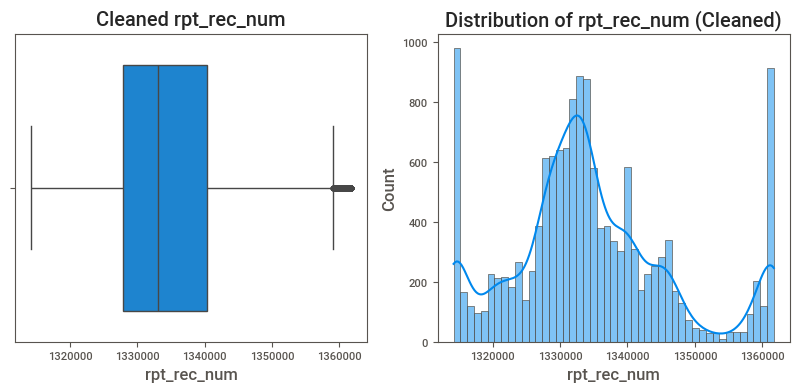

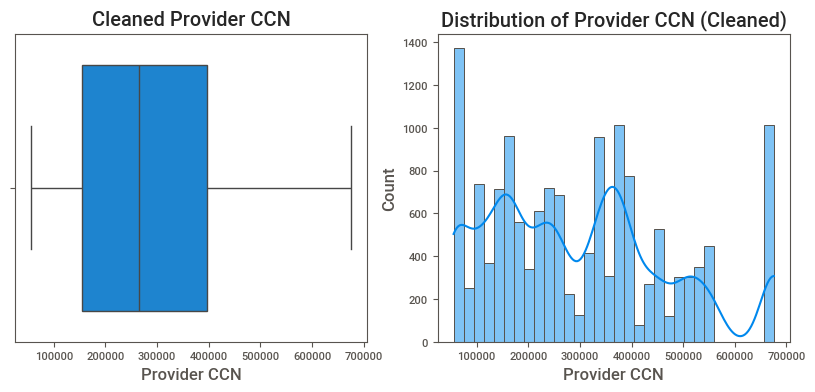

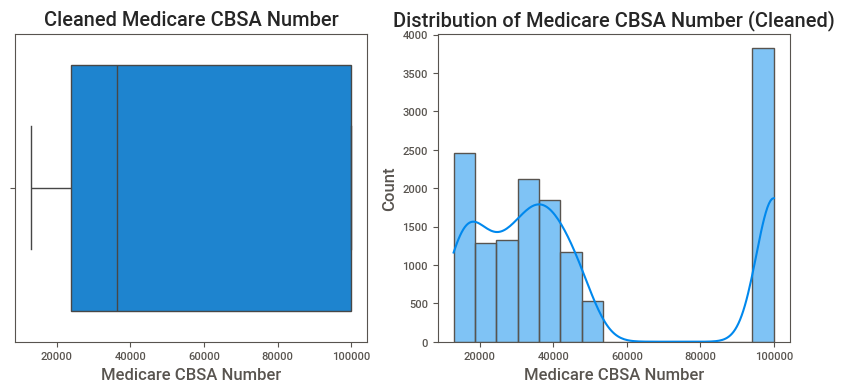

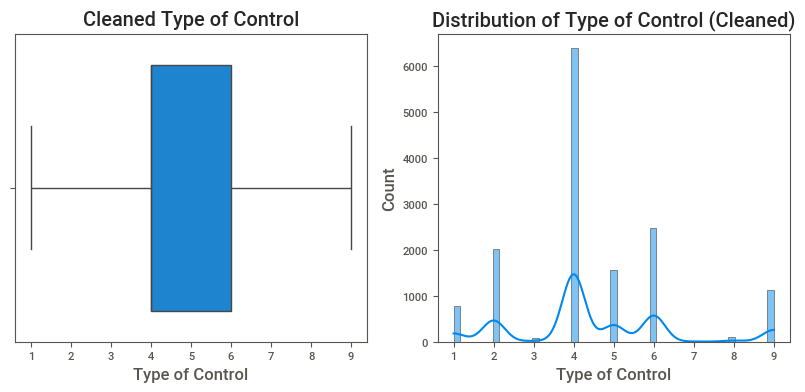

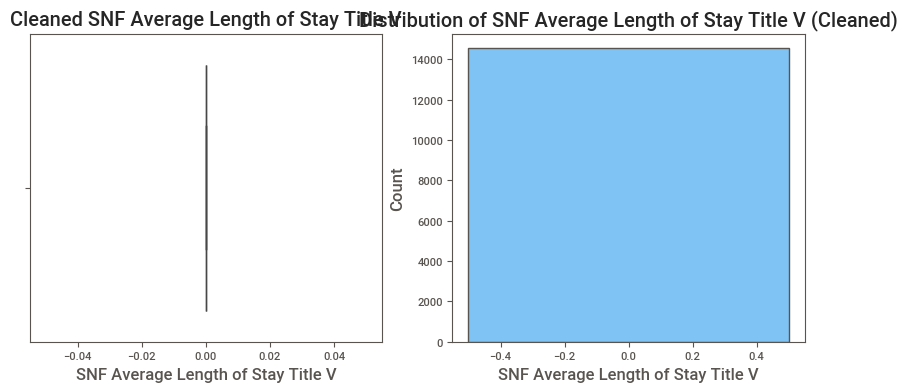

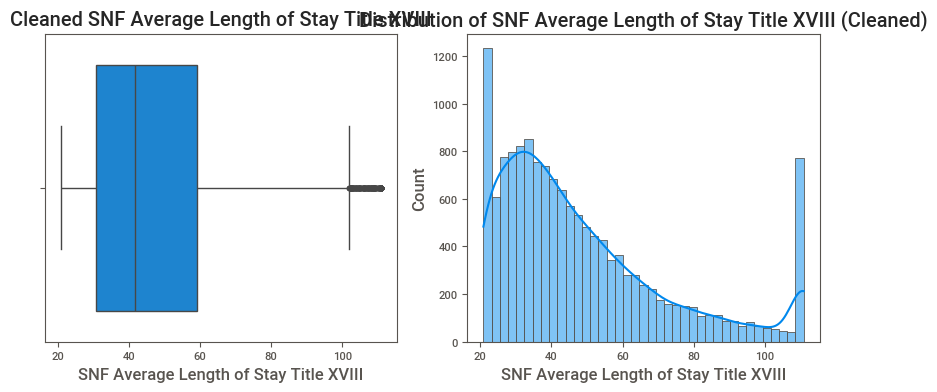

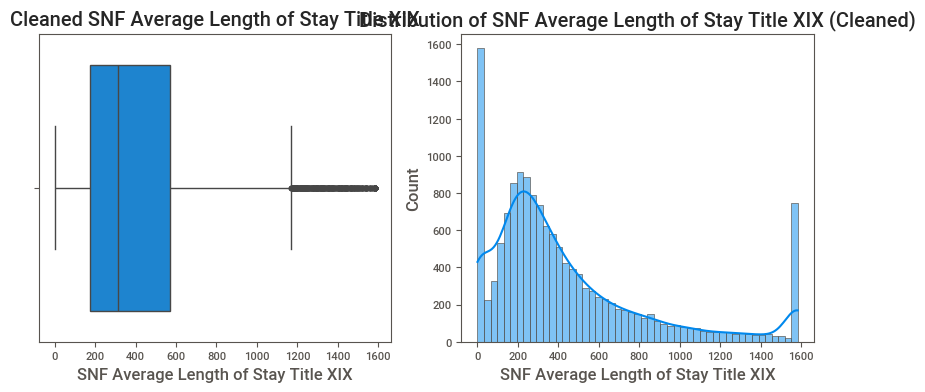

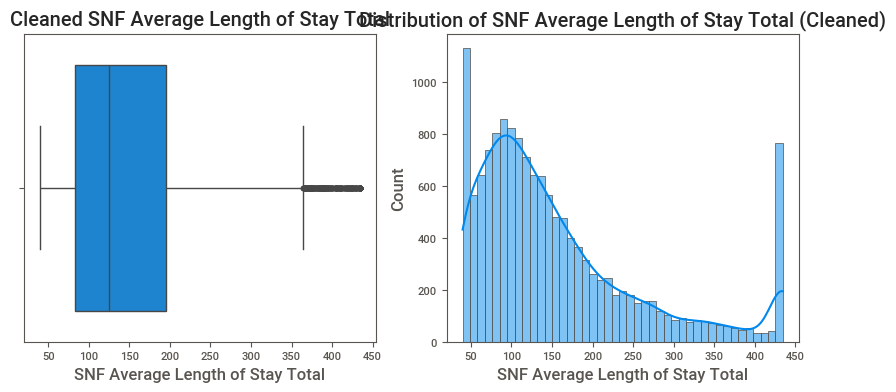

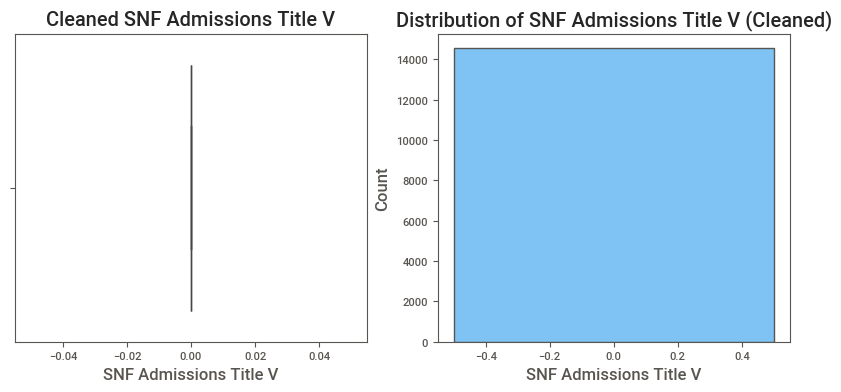

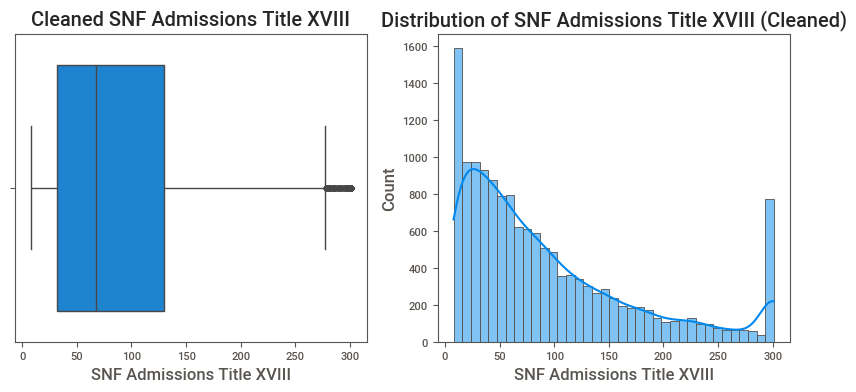

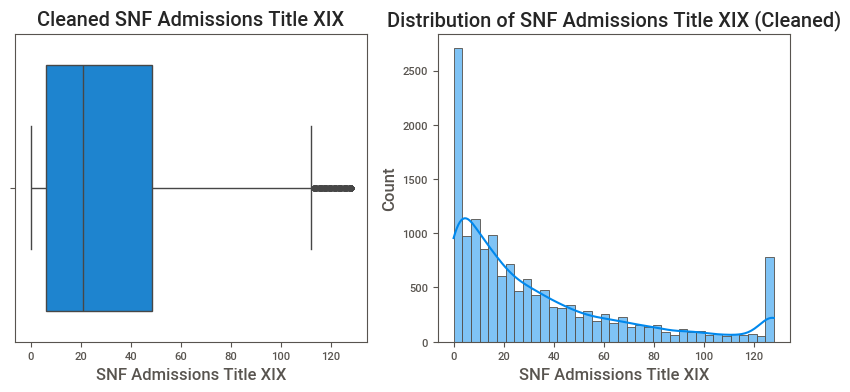

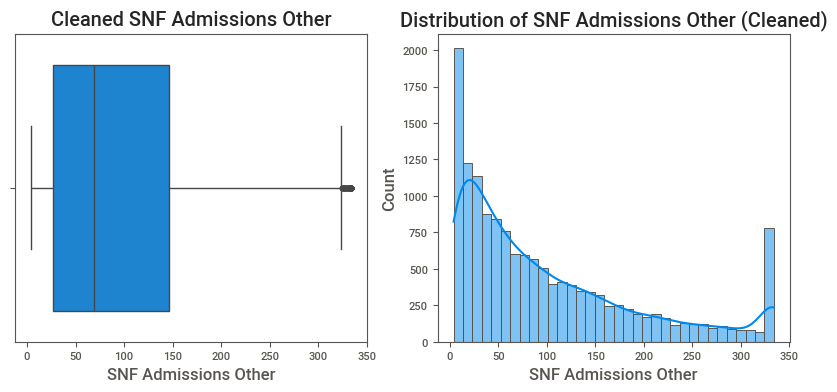

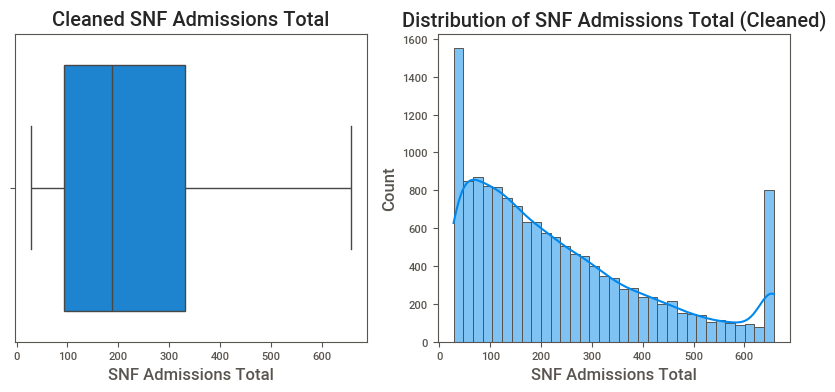

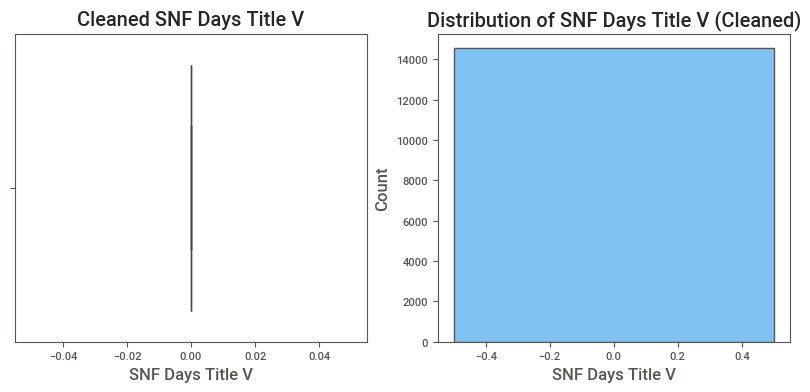

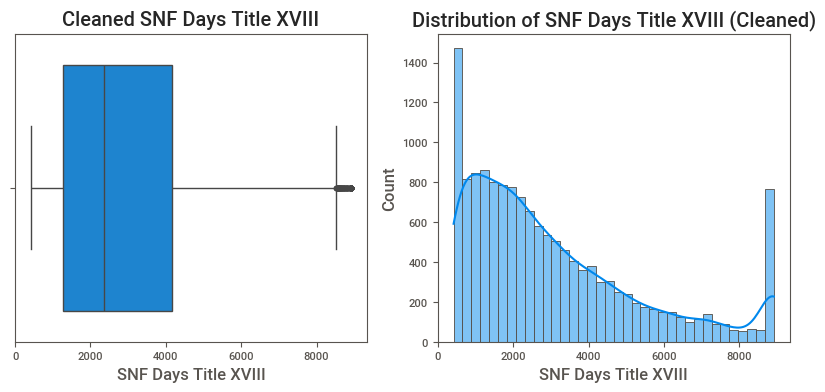

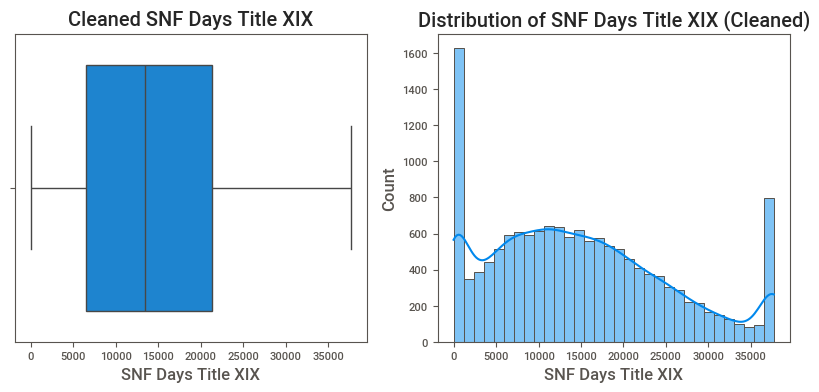

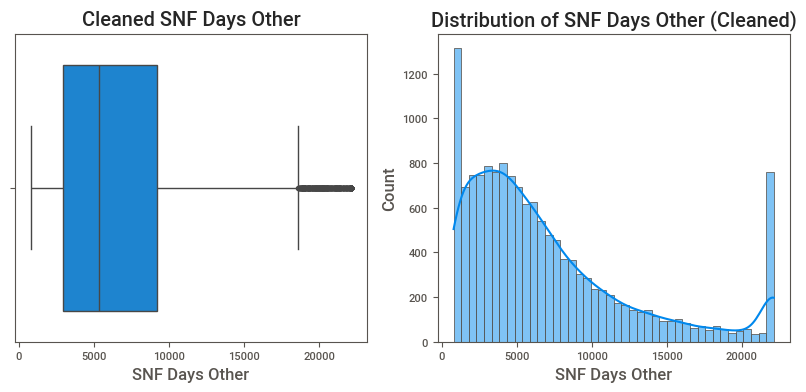

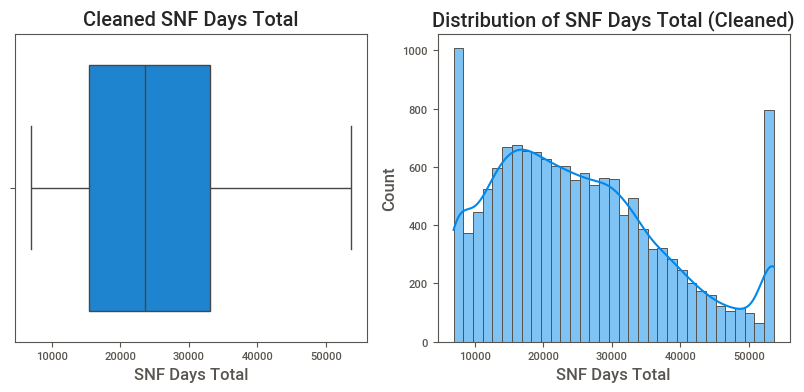

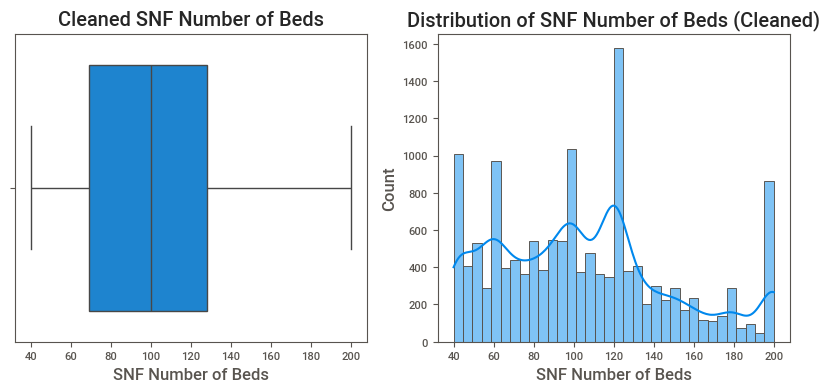

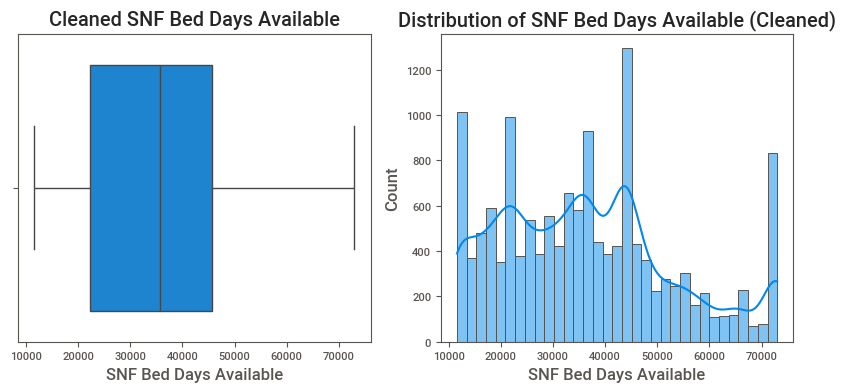

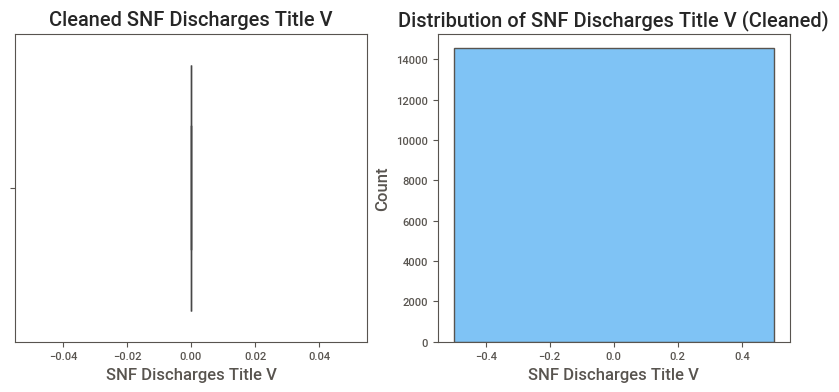

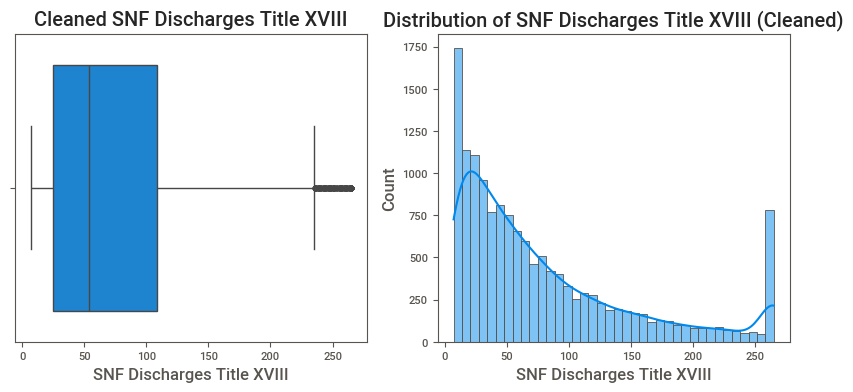

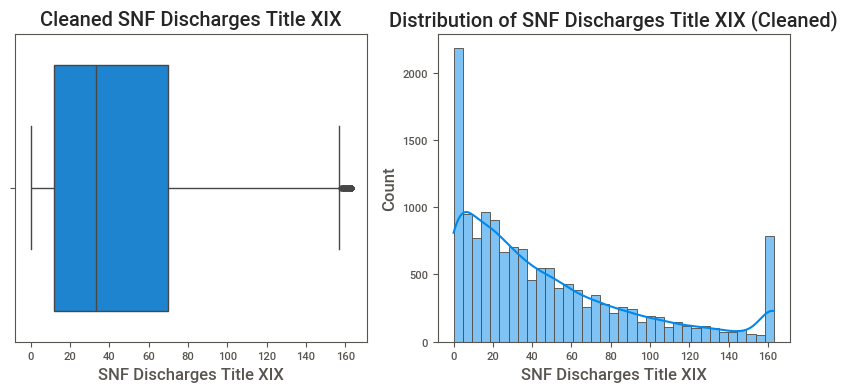

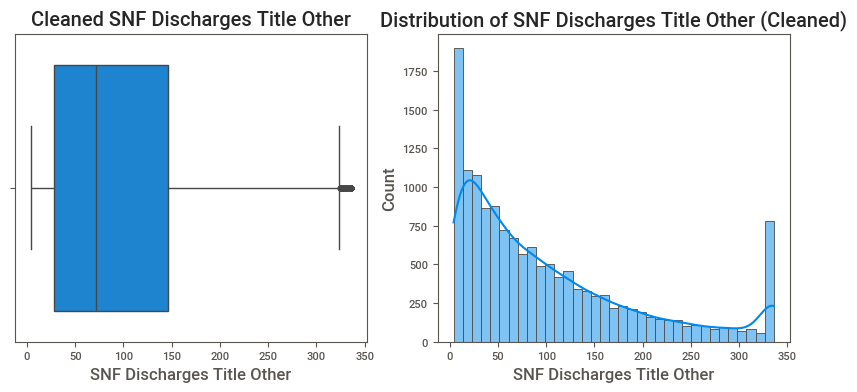

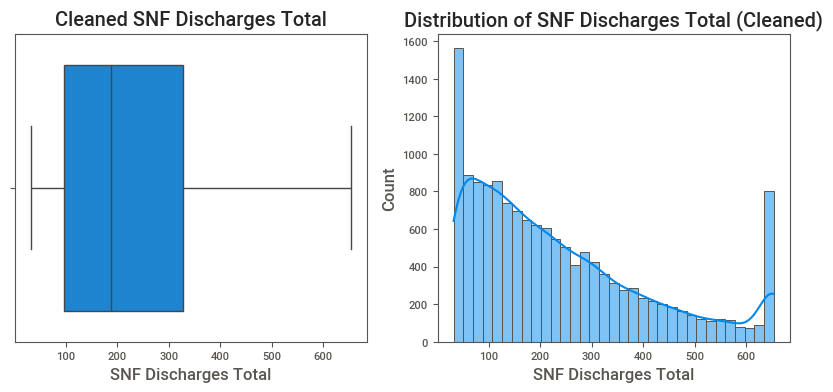

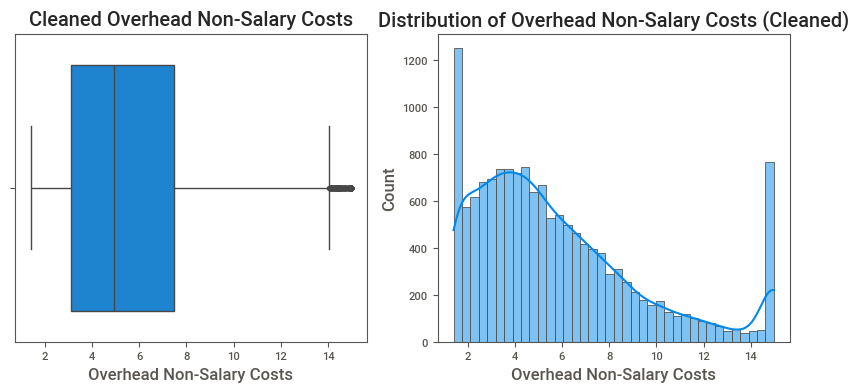

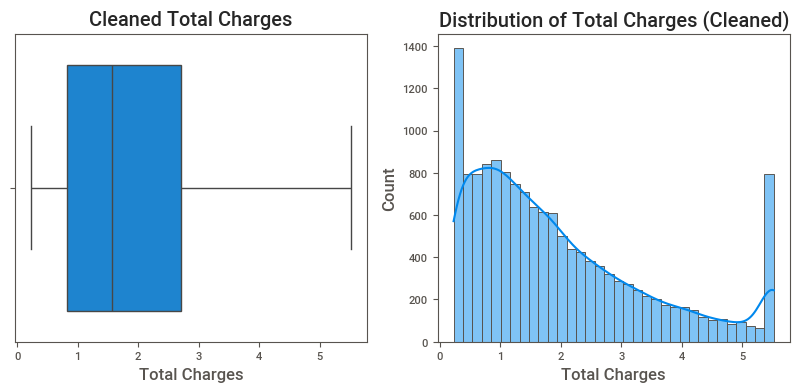

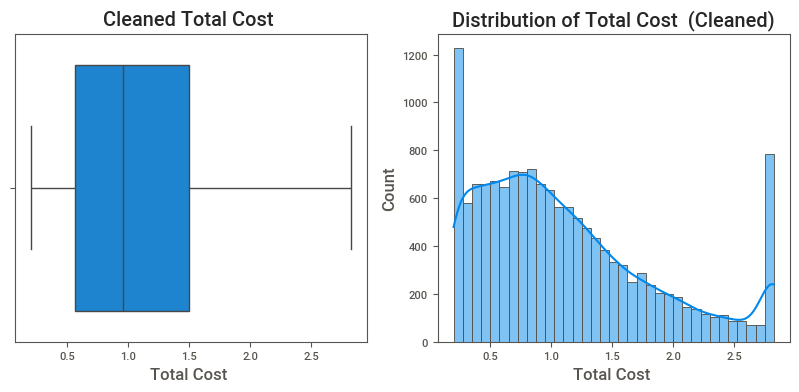

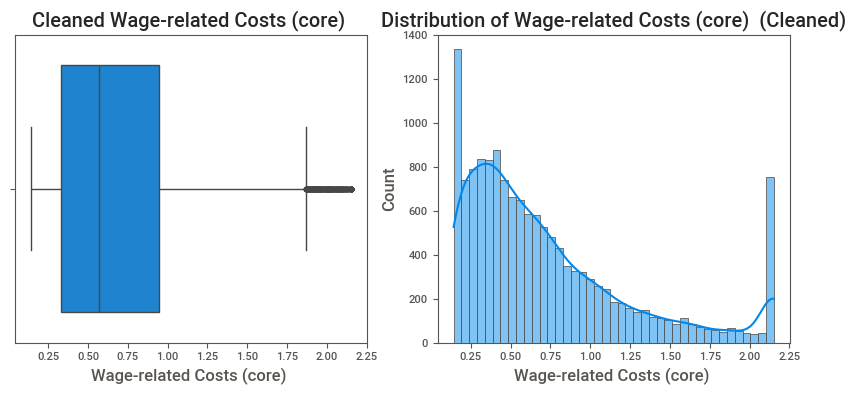

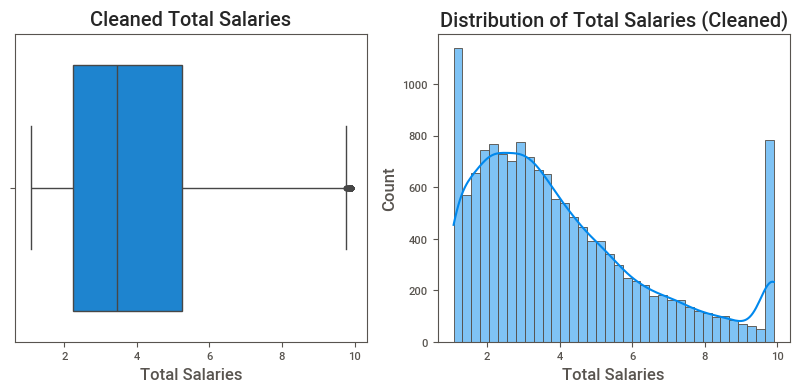

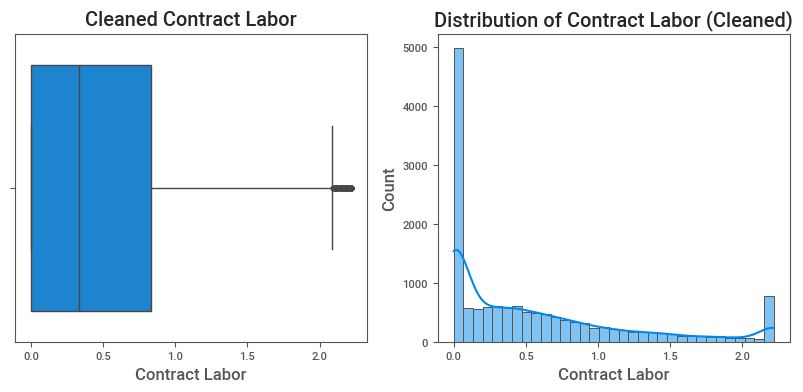

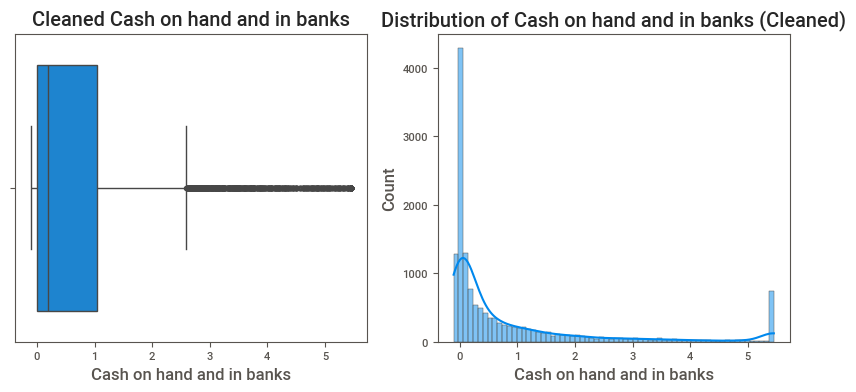

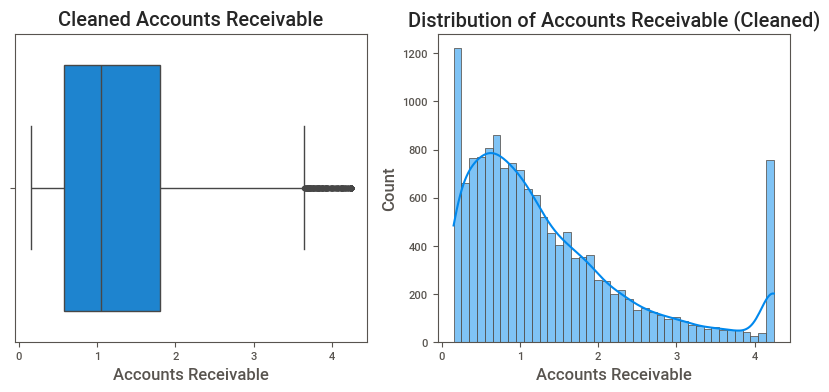

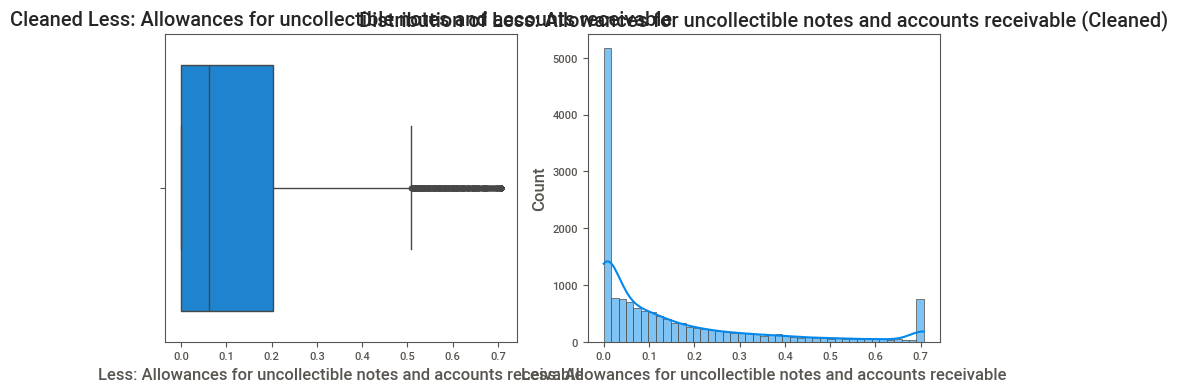

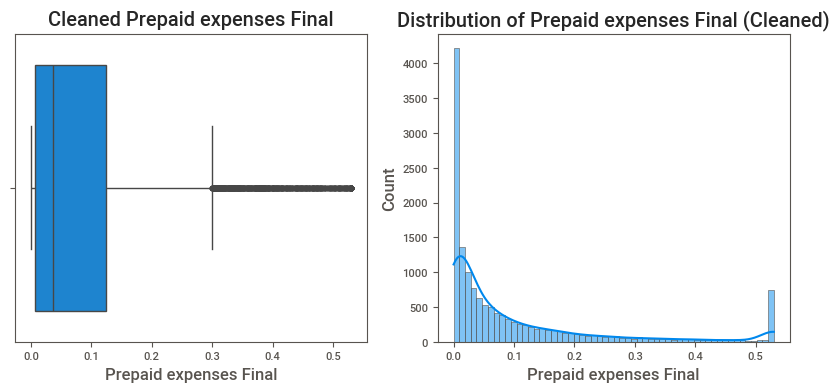

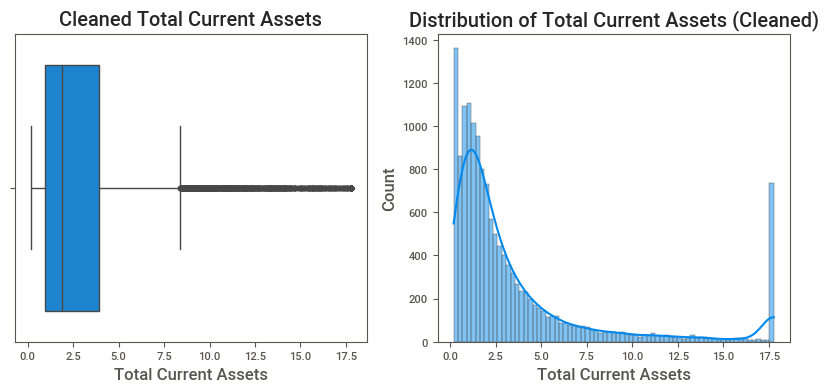

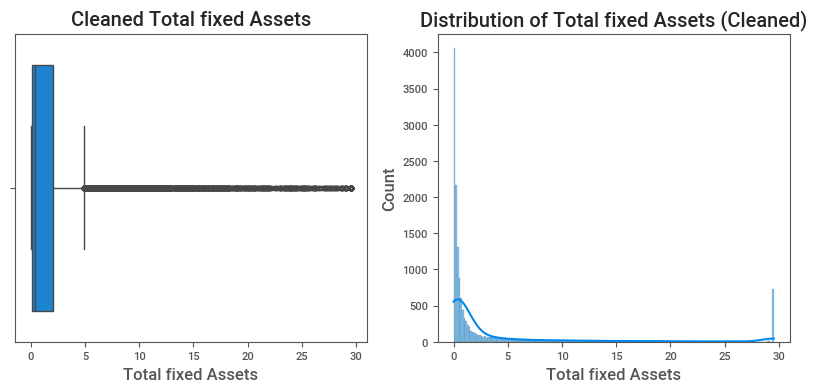

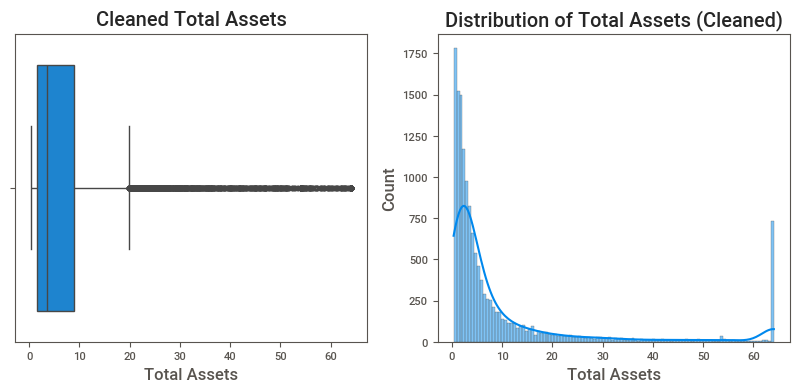

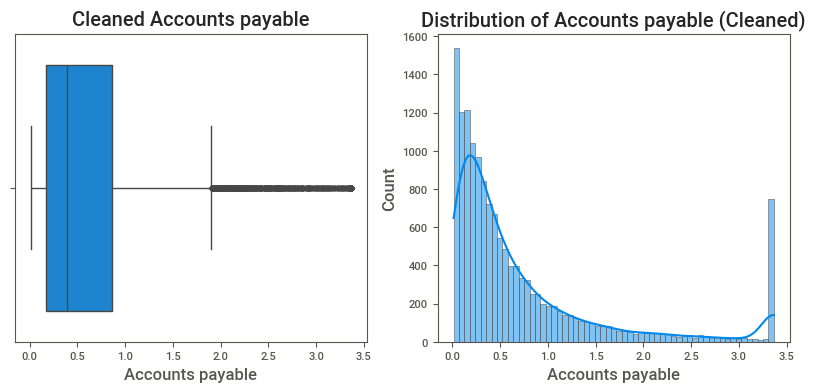

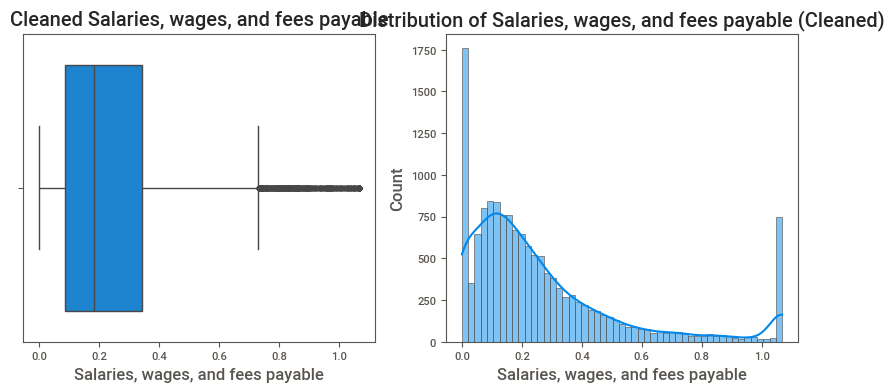

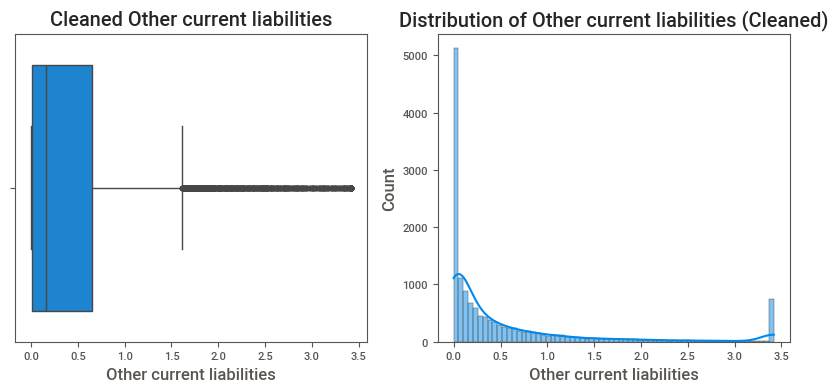

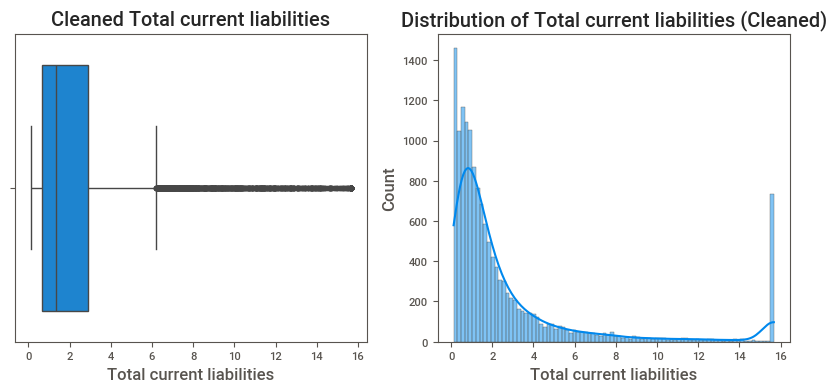

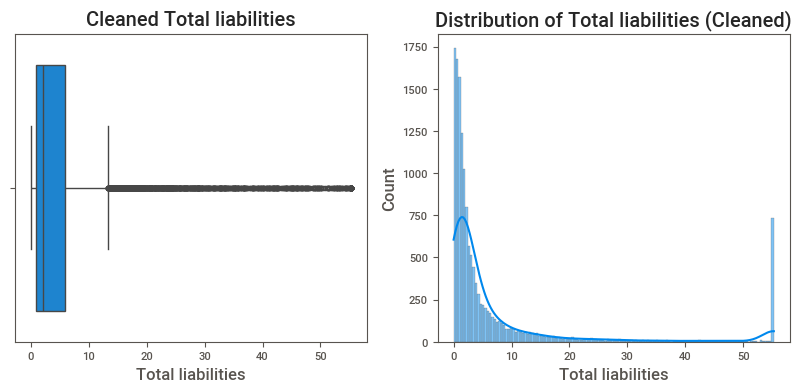

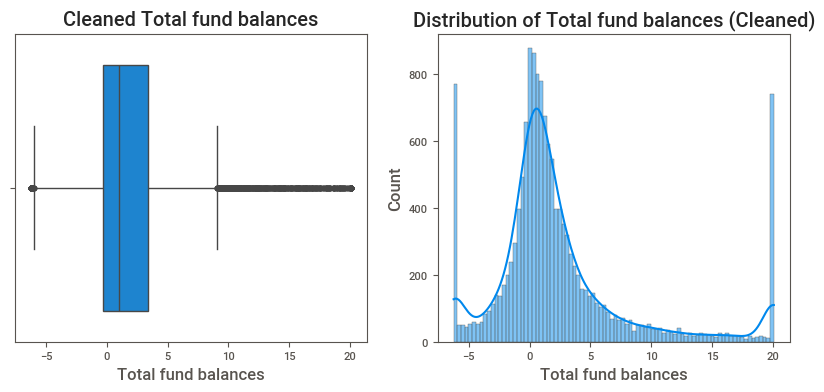

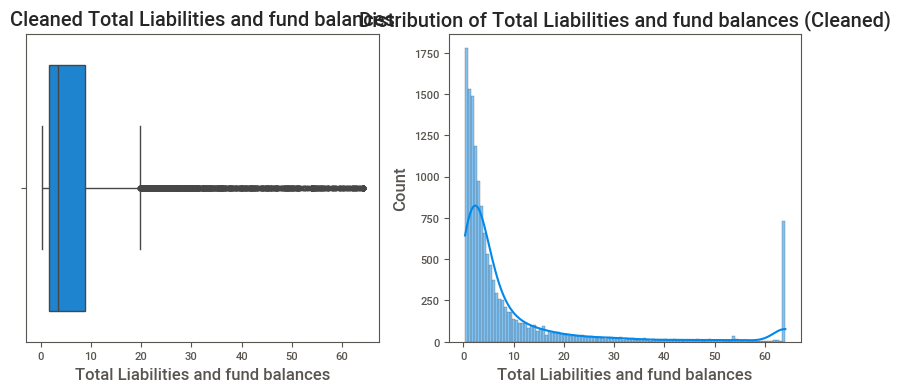

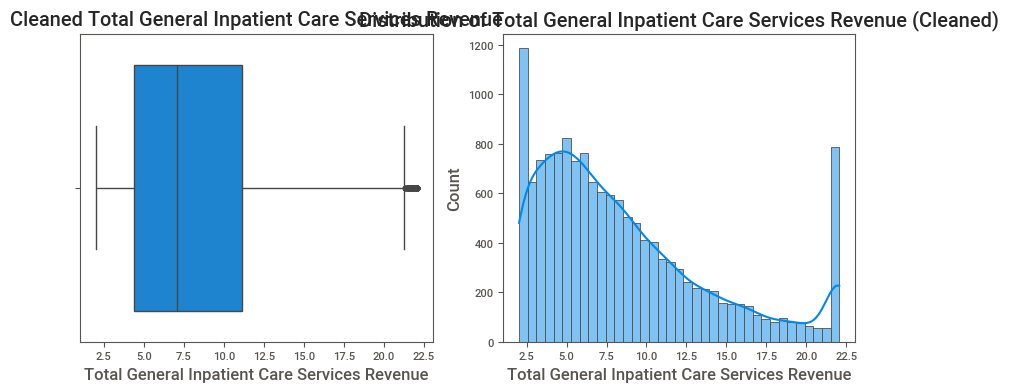

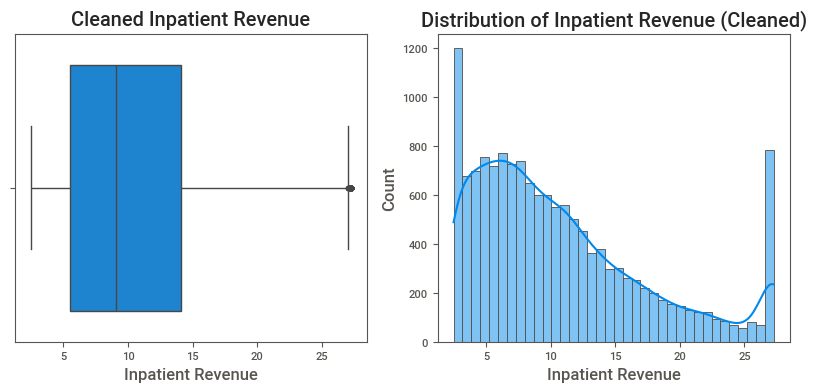

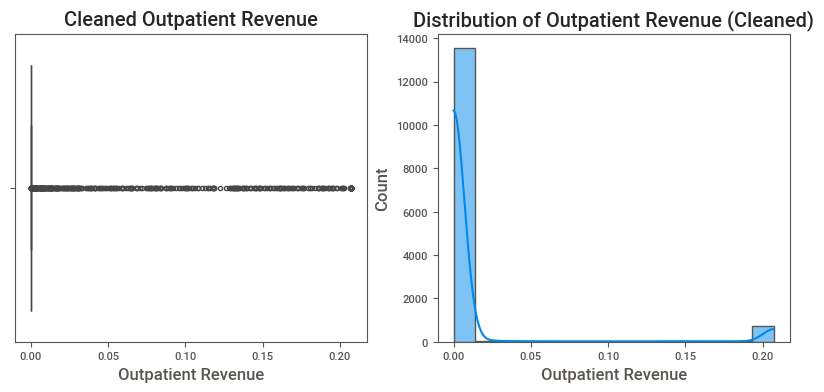

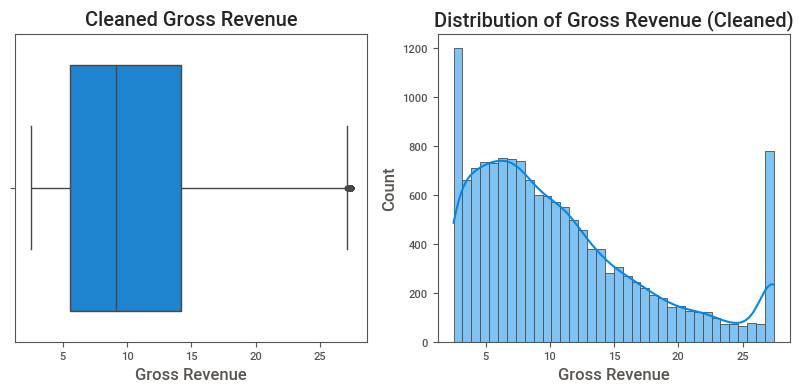

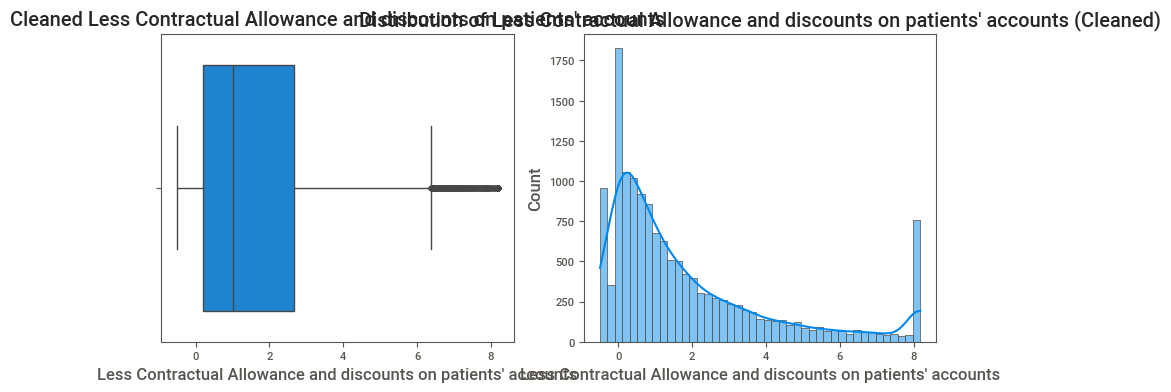

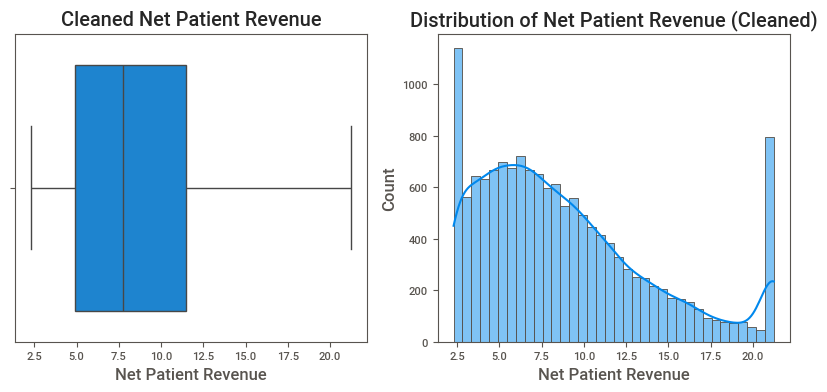

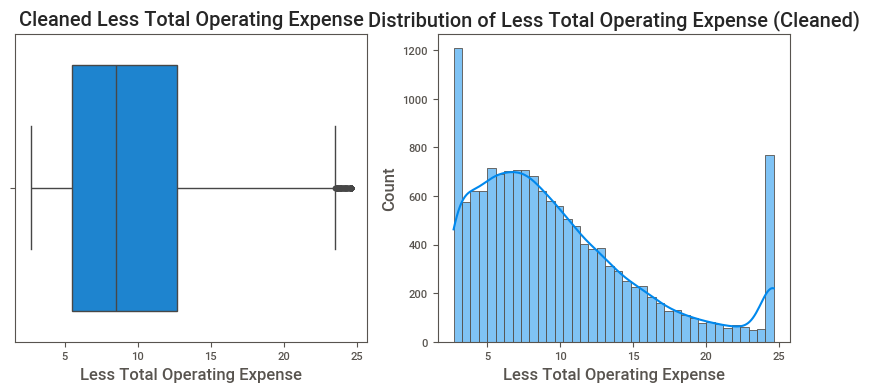

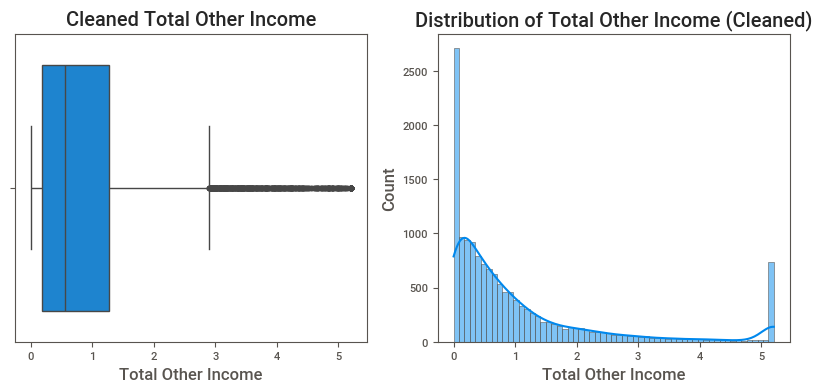

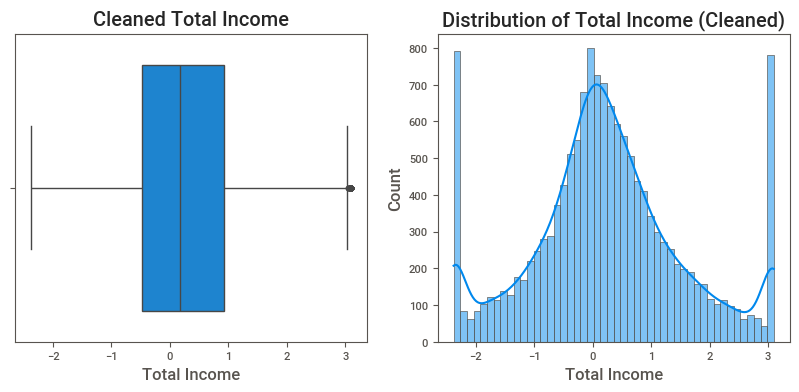

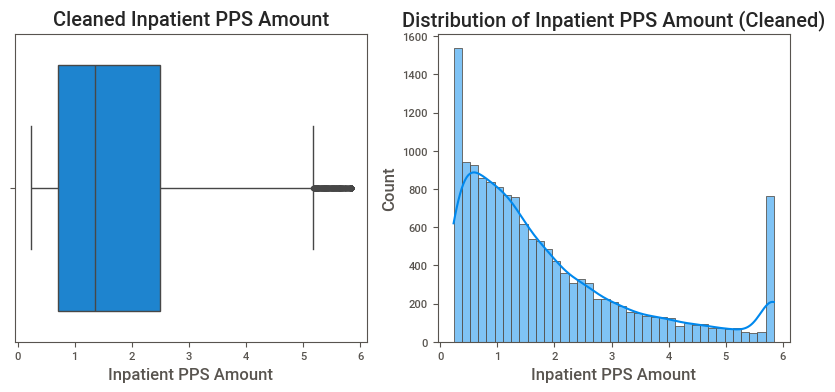

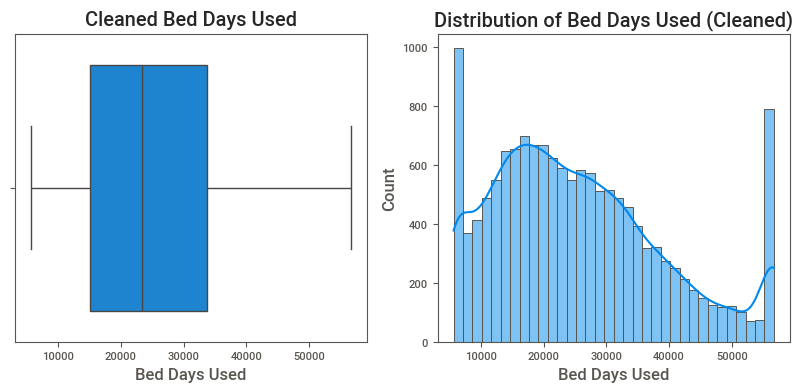

In [ ]:
for column in df.select_dtypes(include=['float64', 'int64']).columns:
    upper_limit = df[column].quantile(0.95)
    lower_limit = df[column].quantile(0.05)
    df[column] = np.where(df[column] > upper_limit, upper_limit, df[column])
    df[column] = np.where(df[column] < lower_limit, lower_limit, df[column])


# Now visualizing the data after removing outliers
for column in df.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(10, 4))

    plt.subplot(1, 2, 1)
    sns.boxplot(data=df, x=column)
    plt.title(f'Cleaned {column}')

    plt.subplot(1, 2, 2)
    sns.histplot(data=df, x=column, kde=True)
    plt.title(f'Distribution of {column} (Cleaned)')

    plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14543 entries, 0 to 14542
Data columns (total 65 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   rpt_rec_num                                                       14543 non-null  float64
 1   Provider CCN                                                      14543 non-null  float64
 2   Facility Name                                                     14543 non-null  object 
 3   Street Address                                                    14542 non-null  object 
 4   City                                                              14543 non-null  object 
 5   State Code                                                        14543 non-null  object 
 6   Zip Code                                                          14543 non-null  object 
 7   County                         

In [ ]:
# Dropping null values
data_cleaned = df.dropna(subset=['Street Address','Medicare CBSA Number'])

#Regression


Here we've used 'SNF Admissions Total' and 'Bed Days Used' as the predictor variables and 'Total Cost ' as target variable to see how the model performs

In [ ]:
X = data_cleaned[['SNF Admissions Total','Bed Days Used']]  # Adding predictors
y = data_cleaned['Total Cost ']

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared:", r_squared)

Mean Squared Error (MSE): 0.1852369834708225
R-squared: 0.6243386633048071


MSE is low but R^2 value is not that great. So, we've adjusted the predictor variables and changed the target variable to see if there is any change in model accuracy

In [ ]:
X = data_cleaned[['SNF Admissions Total','SNF Discharges Total','Bed Days Used']]  # Adjusting the  predictors
y = data_cleaned['Total Charges']
# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared:", r_squared)

Mean Squared Error (MSE): 0.9702675342868936
R-squared: 0.539185494950616


In [ ]:
#Adjusting the predictors
X = data_cleaned[['SNF Admissions Total','SNF Discharges Total','Bed Days Used','SNF Days Total']]
y = data_cleaned['Total Cost ']

# Split the data into training and testing sets (70% train, 30% test)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared:", r_squared)

Mean Squared Error (MSE): 0.16646126627694696
R-squared: 0.6624158921945402


Let's Proceed with Classification by calculating the average of total costs and further classifying the SNFs into low(-1),medium(0) and high(1) efficient categories

In [ ]:
# Recalculate the average total cost without converting from string
total_cost = data_cleaned['Total Cost '].astype(float)
average_total_cost = total_cost.mean()

# Define thresholds for classification into Low, Medium, High cost-efficiency
low_threshold = average_total_cost * 0.8  # 20% below the average
high_threshold = average_total_cost * 1.2  # 20% above the average

# Classify facilities based on total cost
data_cleaned['Cost Efficiency Category'] = pd.cut(total_cost, bins=[0, low_threshold, high_threshold, float('inf')], labels=['-1', '0', '1'], right=False)

# Count the number of facilities in each category and get descriptive statistics for each category
category_counts = data_cleaned['Cost Efficiency Category'].value_counts()
category_descriptions = data_cleaned.groupby('Cost Efficiency Category')['Total Cost '].describe()

category_counts, category_descriptions

(Cost Efficiency Category
 -1    6714
 1     4487
 0     3340
 Name: count, dtype: int64,
                            count      mean       std       min       25%  \
 Cost Efficiency Category                                                   
 -1                        6714.0  0.523184  0.215562  0.199846  0.335475   
 0                         3340.0  1.097588  0.127433  0.889156  0.986751   
 1                         4487.0  2.001553  0.508070  1.333698  1.556614   
 
                                50%       75%       max  
 Cost Efficiency Category                                
 -1                        0.526976  0.713153  0.888833  
 0                         1.091560  1.205122  1.333368  
 1                         1.871260  2.432926  2.826368  )

In [ ]:
data_cleaned['Cost Efficiency Category'].value_counts()

Cost Efficiency Category
-1    6714
1     4487
0     3340
Name: count, dtype: int64

Preparing Data for the models Regression and Classification

In [ ]:
# Select relevant features (excluding identifiers and non-numeric data)
features = data_cleaned.select_dtypes(include=['float64', 'int64']).columns.tolist()
features.remove('Provider CCN')
features.remove('Medicare CBSA Number')
features.remove('rpt_rec_num')# Removing because it's an identifier

# Define the target for regression and classification
target_regression = 'Total Cost '
target_classification = 'Cost Efficiency Category'

# Preparing data for models
X = data_cleaned[features]
y_regression = data_cleaned[target_regression]
y_classification = data_cleaned[target_classification]

# Handling missing values
imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(X)

# Splitting the data into training and testing sets
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_imputed, y_regression, test_size=0.2, random_state=42)
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_imputed, y_classification, test_size=0.2, random_state=42)

# Scaling the features
scaler = StandardScaler()
X_train_reg_scaled = scaler.fit_transform(X_train_reg)
X_test_reg_scaled = scaler.transform(X_test_reg)
X_train_class_scaled = scaler.fit_transform(X_train_class)
X_test_class_scaled = scaler.transform(X_test_class)

# Confirm the shapes of the datasets
X_train_reg_scaled.shape, X_test_reg_scaled.shape, y_train_reg.shape, y_test_reg.shape, X_train_class_scaled.shape, X_test_class_scaled.shape, y_train_class.shape, y_test_class.shape


((11632, 53),
 (2909, 53),
 (11632,),
 (2909,),
 (11632, 53),
 (2909, 53),
 (11632,),
 (2909,))

In [ ]:
# Proceed with training the Classification Model using Random Forest
classifier = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=10)  # Simplified model
classifier.fit(X_train_class_scaled, y_train_class)

# Predict on the test set
y_pred_class = classifier.predict(X_test_class_scaled)

# Generate classification report
classification_metrics_rf = classification_report(y_test_class, y_pred_class, output_dict=True)

classification_metrics_rf


{'-1': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 1366.0},
 '0': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 656.0},
 '1': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 887.0},
 'accuracy': 1.0,
 'macro avg': {'precision': 1.0,
  'recall': 1.0,
  'f1-score': 1.0,
  'support': 2909.0},
 'weighted avg': {'precision': 1.0,
  'recall': 1.0,
  'f1-score': 1.0,
  'support': 2909.0}}

In [ ]:
classification_report_dict = classification_report(y_test_class, y_pred_class, output_dict=True)
classification_report_df = pd.DataFrame(classification_report_dict)
print(classification_report_df)

               -1      0      1  accuracy  macro avg  weighted avg
precision     1.0    1.0    1.0       1.0        1.0           1.0
recall        1.0    1.0    1.0       1.0        1.0           1.0
f1-score      1.0    1.0    1.0       1.0        1.0           1.0
support    1366.0  656.0  887.0       1.0     2909.0        2909.0


In [ ]:
# Cross-validation for the Linear Regression Model
cv_scores_reg = cross_val_score(LinearRegression(), X_imputed, y_regression, cv=5, scoring='neg_mean_squared_error')
cv_rmse_reg = (-cv_scores_reg)**0.5  # Convert to positive RMSE

# Cross-validation for the Random Forest Classifier
cv_scores_class = cross_val_score(RandomForestClassifier(random_state=42, n_estimators=100, max_depth=10), X_imputed, y_classification, cv=5, scoring='accuracy')

cv_rmse_reg.mean(), cv_scores_class.mean()


(1.0122406039300604e-12, 0.9997249204787305)

#Using Correlation matrix to understand the correlation of Target variable Total Cost with other variables

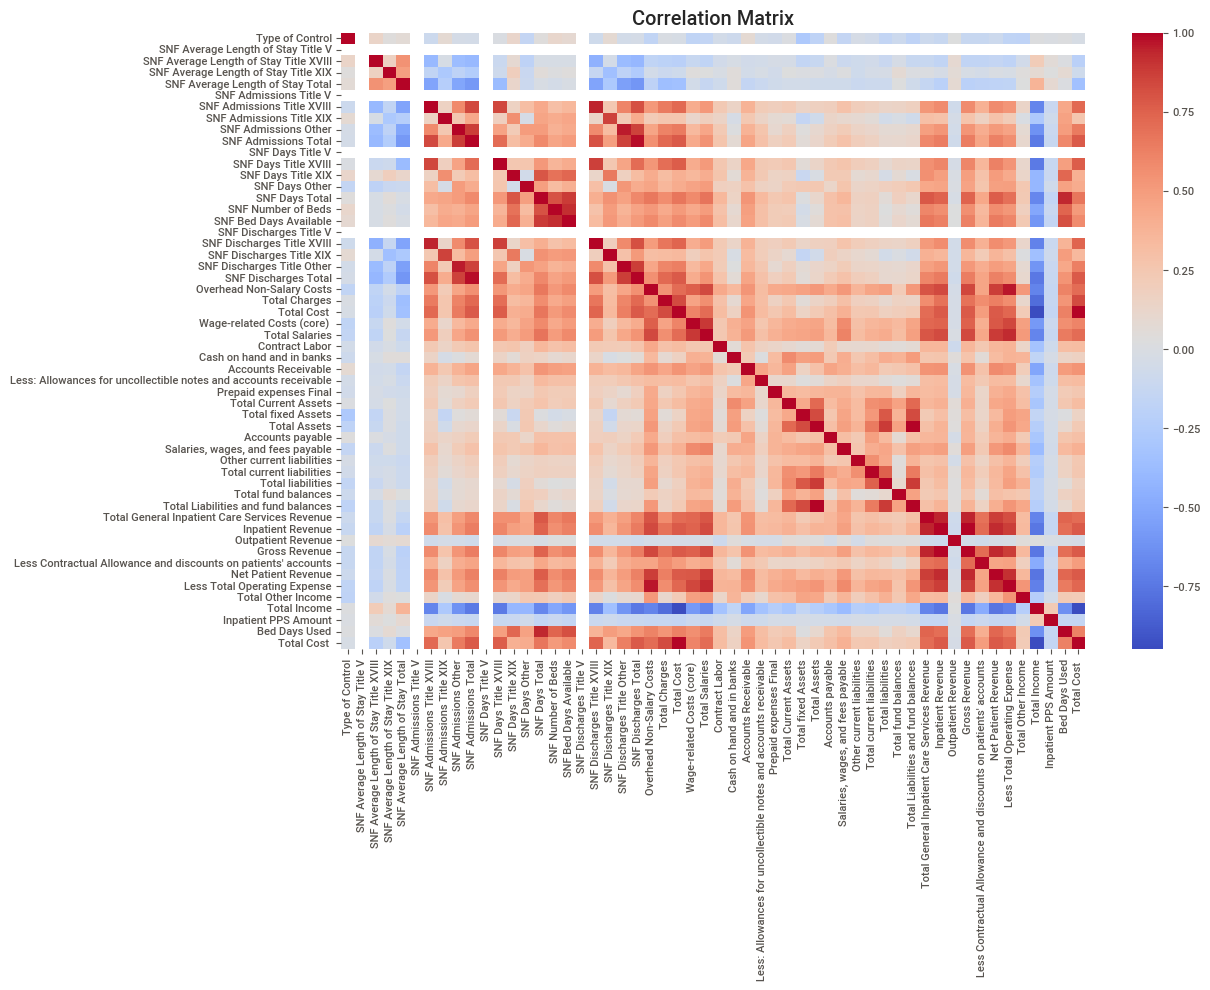

In [ ]:
# Display all features used
features_used = X.columns.tolist()

# Correlation matrix for the features and target (regression)
correlation_matrix = data_cleaned[features_used + [target_regression]].corr()

# Plotting the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".1f")
plt.title('Correlation Matrix')
plt.show()


In [ ]:
total_cost_correlations = correlation_matrix[target_regression]

# Filtering and displaying high correlation features
high_correlation_features = total_cost_correlations[abs(total_cost_correlations) > 0.5]  # High correlation threshold
high_correlation_features


,Total Cost,Total Cost
Type of Control,NaN,NaN
SNF Average Length of Stay Title V,NaN,NaN
SNF Average Length of Stay Title XVIII,NaN,NaN
SNF Average Length of Stay Title XIX,NaN,NaN
SNF Average Length of Stay Total,NaN,NaN
SNF Admissions Title V,NaN,NaN
SNF Admissions Title XVIII,0.721581,0.721581
SNF Admissions Title XIX,NaN,NaN
SNF Admissions Other,0.649485,0.649485
SNF Admissions Total,0.772440,0.772440


In [ ]:
# Adjusting the features by removing 'Less Total Operating Expense' and 'Net Patient Revenue'
adjusted_features = [f for f in features_used if f not in ['Less Total Operating Expense', 'Net Patient Revenue']]

# Prepare the new dataset with adjusted features
X_adjusted = data_cleaned[adjusted_features]
X_adjusted_imputed = imputer.fit_transform(X_adjusted)  # Reapply imputation

# Scaling the adjusted features
X_train_adjusted, X_test_adjusted, y_train_adjusted, y_test_adjusted = train_test_split(X_adjusted_imputed, y_regression, test_size=0.2, random_state=42)
X_train_adjusted_scaled = scaler.fit_transform(X_train_adjusted)
X_test_adjusted_scaled = scaler.transform(X_test_adjusted)

# Retrain the Linear Regression Model with adjusted features
adjusted_linear_regressor = LinearRegression()
adjusted_linear_regressor.fit(X_train_adjusted_scaled, y_train_adjusted)
y_pred_adjusted_reg = adjusted_linear_regressor.predict(X_test_adjusted_scaled)

# Calculate the new RMSE for the adjusted model
adjusted_rmse = mean_squared_error(y_test_adjusted, y_pred_adjusted_reg, squared=False)

# Feature importance analysis for the classification model
classifier.fit(X_train_class_scaled, y_train_class)  # Retrain with original features for importance analysis
feature_importances = classifier.feature_importances_

# Mapping feature names to their importance scores
feature_importance_dict = dict(zip(features_used, feature_importances))

adjusted_rmse, feature_importance_dict


(1.164587067980004e-15,
 {'Type of Control': 0.00037784115307727396,
  'SNF Average Length of Stay Title V': 0.0,
  'SNF Average Length of Stay Title XVIII': 0.0009053093910899294,
  'SNF Average Length of Stay Title XIX': 0.0008341897136973476,
  'SNF Average Length of Stay Total': 0.0019656061835801324,
  'SNF Admissions Title V': 0.0,
  'SNF Admissions Title XVIII': 0.016637415427437845,
  'SNF Admissions Title XIX': 0.0007520486629329812,
  'SNF Admissions Other': 0.002568147093552917,
  'SNF Admissions Total': 0.021341450547654708,
  'SNF Days Title V': 0.0,
  'SNF Days Title XVIII': 0.020323441897419327,
  'SNF Days Title XIX': 0.0010931172424319213,
  'SNF Days Other': 0.0012732282904332883,
  'SNF Days Total': 0.006071740674621137,
  'SNF Number of Beds': 0.0013521377174841478,
  'SNF Bed Days Available': 0.001755298996072286,
  'SNF Discharges Title V': 0.0,
  'SNF Discharges Title XVIII': 0.021336336593480474,
  'SNF Discharges Title XIX': 0.0007697980941393378,
  'SNF Discha

#Classification


In [ ]:
# Selecting additional relevant features based on operational cost drivers
cost_predictors = [
    'SNF Days Total', 'SNF Number of Beds', 'SNF Discharges Total',
    'Total Salaries','Contract Labor', 'Overhead Non-Salary Costs',
]

# Checking for the presence of these columns in the dataset
all(cost_column in data_cleaned.columns for cost_column in cost_predictors)


True

Adjusting the features to ensure that we're choosing the right variables

In [ ]:
# Adjusting features for the classification model by removing direct financial metrics to ensure that the model is not entirely based on derivations of the target variable

# Prepare the dataset with adjusted features for classification
X_class_adjusted = data_cleaned[cost_predictors]
X_class_adjusted_imputed = imputer.fit_transform(X_class_adjusted)  # Reapply imputation

# Scaling the adjusted features for classification
X_train_class_adjusted, X_test_class_adjusted, y_train_class_adjusted, y_test_class_adjusted = train_test_split(
    X_class_adjusted_imputed, y_classification, test_size=0.2, random_state=42)
X_train_class_adjusted_scaled = scaler.fit_transform(X_train_class_adjusted)
X_test_class_adjusted_scaled = scaler.transform(X_test_class_adjusted)

# Retrain the Random Forest Classifier with adjusted features
adjusted_classifier = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=10)
adjusted_classifier.fit(X_train_class_adjusted_scaled, y_train_class_adjusted)
y_pred_class_adjusted = adjusted_classifier.predict(X_test_class_adjusted_scaled)

# Evaluate the adjusted classification model
adjusted_classification_metrics = classification_report(y_test_class_adjusted, y_pred_class_adjusted, output_dict=True)

adjusted_classification_metrics


{'-1': {'precision': 0.8244491826581379,
  'recall': 0.849194729136164,
  'f1-score': 0.8366390191128742,
  'support': 1366.0},
 '0': {'precision': 0.48442367601246106,
  'recall': 0.4740853658536585,
  'f1-score': 0.47919876733436056,
  'support': 656.0},
 '1': {'precision': 0.791860465116279,
  'recall': 0.7677564825253664,
  'f1-score': 0.7796222095020034,
  'support': 887.0},
 'accuracy': 0.7397731179099347,
 'macro avg': {'precision': 0.7002444412622927,
  'recall': 0.697012192505063,
  'f1-score': 0.6984866653164127,
  'support': 2909.0},
 'weighted avg': {'precision': 0.737834220533974,
  'recall': 0.7397731179099347,
  'f1-score': 0.7386483985245116,
  'support': 2909.0}}

In [ ]:
report = classification_report(y_test_class_adjusted, y_pred_class_adjusted)
print(report)

              precision    recall  f1-score   support

          -1       0.82      0.85      0.84      1366
           0       0.48      0.47      0.48       656
           1       0.79      0.77      0.78       887

    accuracy                           0.74      2909
   macro avg       0.70      0.70      0.70      2909
weighted avg       0.74      0.74      0.74      2909



This model accuracy is good but the precision and recall of Medium(0) class are very low, so let's try XGBoost (Xtreme Gradient Booster) and see if it gives better results

#XGBoost

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE

# Encode labels
label_encoder = LabelEncoder()
data_cleaned['Encoded Labels'] = label_encoder.fit_transform(data_cleaned['Cost Efficiency Category'])

# Data and target
X = data_cleaned[cost_predictors]
y = data_cleaned['Encoded Labels']

# Handling imbalance with SMOTE
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

# Initialize and train the XGBoost model
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))


              precision    recall  f1-score   support

          -1       0.82      0.78      0.80      1998
           0       0.62      0.68      0.65      2014
           1       0.80      0.77      0.78      2031

    accuracy                           0.74      6043
   macro avg       0.75      0.74      0.74      6043
weighted avg       0.75      0.74      0.74      6043



The results of Class Medium(0) have increased but the accurary is still the same, so lets tune the model.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier

# Define the model
model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

# Define the parameter grid
param_grid = {
    'max_depth': [3,4,5,6,7,8,9,10],
    'min_child_weight': [1,2,3,4,5,6,7,],
    'subsample': [0.6,0.7,0.8,0.9,0.5],
    'colsample_bytree': [0.5,0.6,0.7,0.8,0.9],
    'learning_rate': [0.01,0.02,0.1,0.16,0.2],
    'n_estimators': [100, 200, 300, 400, 500]
}

# Setup the RandomizedSearch with cross-validation
random_search = RandomizedSearchCV(model, param_distributions=param_grid, n_iter=50, scoring='accuracy', n_jobs=-1, cv=3, random_state=42)

# Fit RandomizedSearch
random_search.fit(X, y)

# Print best score and best parameters
print("Best Score:", random_search.best_score_)
print("Best Parameters:", random_search.best_params_)


Best Score: 0.7478852898700227
Best Parameters: {'subsample': 0.9, 'n_estimators': 400, 'min_child_weight': 7, 'max_depth': 6, 'learning_rate': 0.01, 'colsample_bytree': 0.9}


In [ ]:
pip install dtreeviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 2.2 MB/s eta 0:00:00


<Figure size 2e+06x1.5e+06 with 0 Axes>

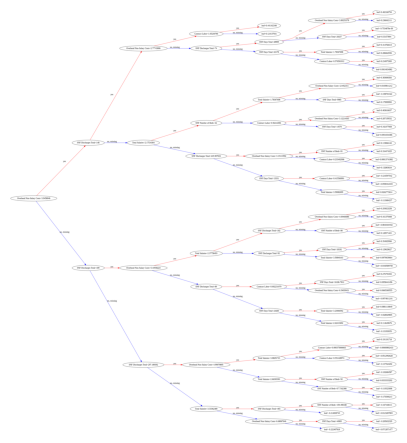

In [ ]:
import xgboost as xgb
from xgboost import plot_tree
import matplotlib.pyplot as plt

model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
model.fit(X_train, y_train)# Assuming model is your trained XGBoost model


# Plotting the first tree
plt.figure(figsize = (20000, 15000))
plot_tree(model, num_trees=0, rankdir='LR')  # num_trees is the index of the tree to plot, 'LR' means horizontal tree
plt.show()


# Regression

Selecting Predictor Variables based on relevant cost drivers

In [ ]:
# Creating the feature matrix X with the selected predictors and setting up 'Total cost ' as target variable
X_costs = data_cleaned[cost_predictors]
y_total_cost = data_cleaned['Total Cost ']

# Splitting the data into train and test sets for the total cost
X_train_costs, X_test_costs, y_train_costs, y_test_costs = train_test_split(
    X_costs, y_total_cost, test_size=0.2, random_state=42)




#Random Forest Regressor

In [ ]:
#Setting up and training random forest regressor
# Initialize the Random Forest Regressor
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Training the Random Forest model
random_forest_model.fit(X_train_costs, y_train_costs)

# Predicting on the test set
y_pred_rf_costs = random_forest_model.predict(X_test_costs)

# Calculating performance metrics for the Random Forest prediction
rmse_rf_costs = mean_squared_error(y_test_costs, y_pred_rf_costs, squared=False)
r2_rf_costs = r2_score(y_test_costs, y_pred_rf_costs)

rmse_rf_costs, r2_rf_costs,

(0.3486375044981549, 0.7498506008050194)

#Performing Cross Validation


In [ ]:
#Cross Validation involves pertitioning the data into subsets, repeatedly training the model on some subsets while validating it on others.
#This helps ensure that the model performs well across different segments of the data.
# Initialize the Random Forest Regressor
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Perform 10-fold cross-validation for R²
cv_r2_scores = cross_val_score(random_forest_model, X_costs, y_total_cost, cv=10, scoring='r2')

# Perform 10-fold cross-validation for RMSE (using neg_root_mean_squared_error and converting it)
cv_rmse_scores = cross_val_score(random_forest_model, X_costs, y_total_cost, cv=10, scoring='neg_root_mean_squared_error')
cv_rmse_scores = -cv_rmse_scores  # Convert to positive RMSE values

# Calculate average scores
average_r2 = np.mean(cv_r2_scores)
average_rmse = np.mean(cv_rmse_scores)

print("Average R²:", average_r2)
print("Average RMSE:", average_rmse)




Average R²: 0.7604915798858842
Average RMSE: 0.3472085348192381


#Using Gradient Boosting Regressor to see if it gives any better results

In [ ]:
# Reinitialize and re-split the dataset to ensure consistency

X_train_costs, X_test_costs, y_train_costs, y_test_costs = train_test_split(X_costs, y_total_cost, test_size=0.2, random_state=42)

# Reinitialize the Gradient Boosting Regressor
gbm_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Training the GBM model again
gbm_model.fit(X_train_costs, y_train_costs)

# Predicting on the test set again
y_pred_gbm = gbm_model.predict(X_test_costs)

# Calculating performance metrics again
rmse_gbm = mean_squared_error(y_test_costs, y_pred_gbm, squared=False)
r2_gbm = r2_score(y_test_costs, y_pred_gbm)

print(rmse_gbm)
print(r2_gbm)


0.3473488684140628
0.7516963907684674


There's a minute difference in the results of the Random Forest Regressor and Gradient Boosting Regressor. Both the models are performing well.